# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Advance Regression, TEAM NM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import plotly.express as px
# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df = pd.read_csv('df_train.csv')
df_test= pd.read_csv('df_test.csv')

In [4]:
df_test.shape

(2920, 48)

In [5]:
df_test.isnull().sum()
df_test['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)

In [6]:
df_test.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
# look at data statistics
print(f' There are {df.shape[0]} rows and {df.shape[1]} columns')
df.head(5)

 There are 8763 rows and 49 columns


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1,1,1,1,1,1,1,1
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9
Bilbao_rain_1h,0,0,0,0,0,0,0,0,0,0
Valencia_wind_speed,0.666667,1.66667,1,1,1,1,1,1,1,1.33333
Seville_humidity,74.3333,78.3333,71.3333,65.3333,59,69.6667,83.6667,83.6667,86,87
Madrid_humidity,64,64.6667,64.3333,56.3333,57,67.3333,63.3333,64,63.3333,63.6667
Bilbao_clouds_all,0,0,0,0,2,12.3333,16.3333,8.66667,5.33333,15.3333
Bilbao_wind_speed,1,1,1,1,0.333333,0.666667,1,1.33333,1,1


In [9]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [10]:
print(df.isnull().sum())

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


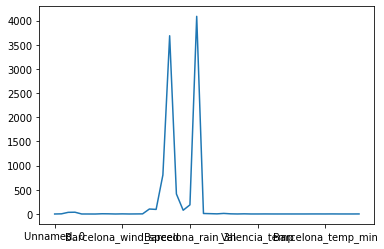

In [16]:
# plot relevant feature interactions
df.kurtosis().plot()

In [17]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

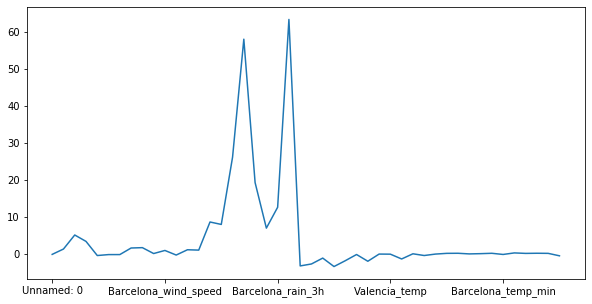

In [20]:
plt.figure(figsize = [10,5])
df.skew(axis=0, skipna=True).plot()

In [21]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [25]:
fig = px.line(df, y = df['load_shortfall_3h'], x =df['time'], width =1000, height=900 )
fig.show()


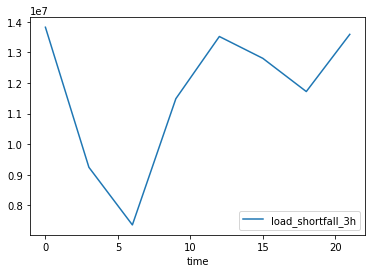

In [26]:
df.groupby([df['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True)



In [27]:
px.line(df.groupby([df['time'].astype('datetime64').dt.year])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Year',
        y='load_shortfall_3h',width =800, height=400 )

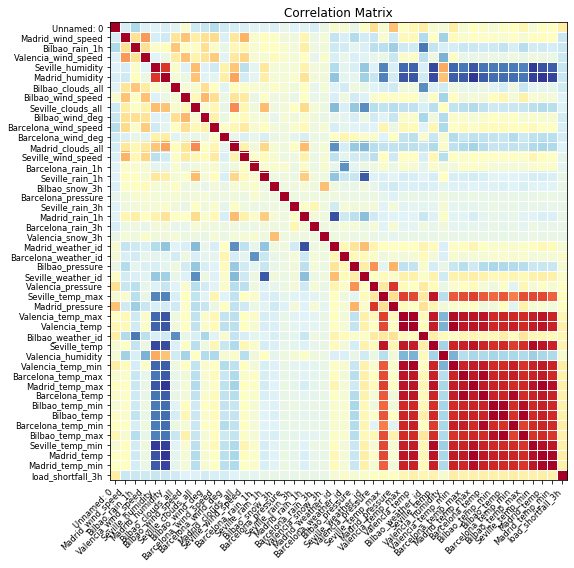

In [29]:
# evaluate correlation
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax, );

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <a list of 10 Patch objects>)

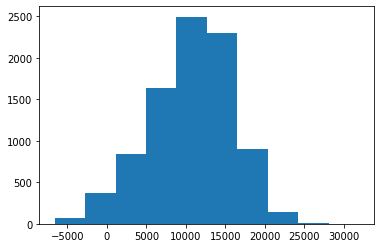

In [30]:
# have a look at feature distributions
plt.hist(df['load_shortfall_3h'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [31]:
# remove missing values/ features
df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)

In [32]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)').astype('int64')


In [33]:
# create new features
df['Year']  = df['time'].astype('datetime64').dt.year
df['Month_of_year']  = df['time'].astype('datetime64').dt.month
df['Week_of_year'] = df['time'].astype('datetime64').dt.weekofyear
df['Day_of_year']  = df['time'].astype('datetime64').dt.dayofyear
df['Day_of_month']  = df['time'].astype('datetime64').dt.day
df['Day_of_week'] = df['time'].astype('datetime64').dt.dayofweek
df['Hour_of_week'] = ((df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df['time'].astype('datetime64').dt.hour)
df['Hour_of_day']  = df['time'].astype('datetime64').dt.hour


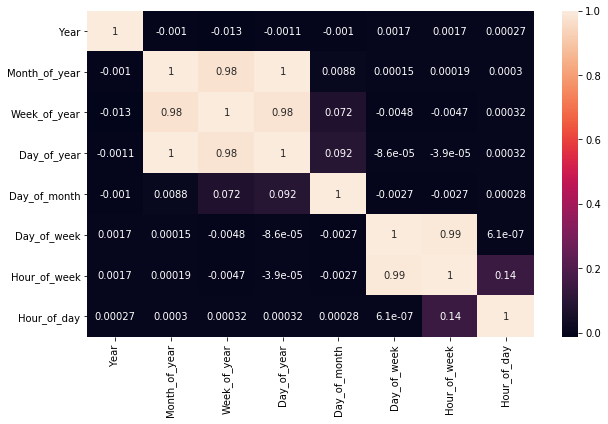

In [34]:
Time_df = df.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )


In [36]:
# engineer existing features
df = df.drop(columns=['Week_of_year','Day_of_year','Hour_of_week', 'Unnamed: 0','time'])

In [37]:
X = df.drop(columns = 'load_shortfall_3h')
y = df['load_shortfall_3h'].astype('int')


In [38]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.shape 

(40, 2)

In [39]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]


In [40]:
scaler = StandardScaler()

In [41]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.shape

(8763, 36)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [42]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state = 42)

In [43]:
print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)


Training predictor: (7010, 36)
Training target: (7010,)
Testing predictor: (1753, 36)
Testing target: (1753,)


In [44]:
lm = LinearRegression()

In [45]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
predict = lm.predict(X_test)
train_predict = lm.predict(X_train)

In [47]:
# create targets and features dataset
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
# create one or more ML models
lasso_pred = lasso.predict(X_test)

In [49]:
# evaluate one or more ML models
Ridge = Ridge()
Ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
Ridge_pred = Ridge.predict(X_test)

In [51]:
Sv_reg = SVR(kernel='rbf', gamma='auto') 

In [52]:
Sv_reg.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
SV_pred = Sv_reg.predict(X_test)

In [68]:
Reg_tree = DecisionTreeRegressor(random_state = 42) 
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

In [69]:
RF = RandomForestRegressor(n_estimators=200, max_depth=8)

In [70]:
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [71]:
# Compare model performance
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_= pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [72]:
print(Linear.head()) 

      Actual     Predicted
1226   11450  12402.636182
7903   13693  12245.041069
1559   18337  11989.975721
3621   -1221   9383.384417
7552    8515  14086.322696


In [73]:
print(Lass_.head()) 

      Actual     Predicted
1226   11450  12402.596545
7903   13693  12245.032510
1559   18337  11989.974822
3621   -1221   9383.406078
7552    8515  14086.234318


In [74]:
print(Ridge_.head()) 

      Actual     Predicted
1226   11450  12402.251854
7903   13693  12244.719235
1559   18337  11990.023803
3621   -1221   9383.425692
7552    8515  14085.757950


In [75]:
print(Sv_.head()) 

      Actual     Predicted
1226   11450  11119.964057
7903   13693  11106.784848
1559   18337  11211.627698
3621   -1221  11021.139113
7552    8515  11220.062862


In [76]:
print(Des_.head()) 

      Actual  Predicted
1226   11450     8593.0
7903   13693    11016.0
1559   18337    18497.0
3621   -1221      934.0
7552    8515    10368.0


In [77]:
print(Rand_.head()) 

      Actual     Predicted
1226   11450   7389.806276
7903   13693  16930.667514
1559   18337  14231.584977
3621   -1221   4718.308842
7552    8515  10700.182856


In [78]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


In [79]:
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Decision Tree,3871.701641
Lasso,4845.428409
Linear model,4845.426919
Random Forest,3337.795586
Ridge,4845.426261
SVR,5294.969170


In [80]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)

In [81]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }


In [82]:
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Decision Tree,1.499007e+07
Lasso,2.347818e+07
Linear model,2.347816e+07
Random Forest,1.114088e+07
Ridge,2.347816e+07
SVR,2.803670e+07


In [83]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }


In [84]:
Model_Performance3 = pd.DataFrame(data=Model_Performance3)

In [85]:
Model_Performance3

,Test MAE
Decision Tree,2795.033657
Lasso,3858.659602
Linear model,3858.656423
Random Forest,2642.002599
Ridge,3858.663652
SVR,4227.299991


In [86]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)

In [87]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}}


In [88]:
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Test R^2
Decision Tree,0.467724
Lasso,0.166323
Linear model,0.166324
Random Forest,0.604403
Ridge,0.166324
SVR,0.004456


In [89]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)

In [90]:
# Choose best model and motivate why it is the best choice (coming soon)

In [91]:
df_test['Year']  = df_test['time'].astype('datetime64').dt.year
df_test['Month_of_year']  = df_test['time'].astype('datetime64').dt.month
df_test['Week_of_year'] = df_test['time'].astype('datetime64').dt.weekofyear
df_test['Day_of_year']  = df_test['time'].astype('datetime64').dt.dayofyear
df_test['Day_of_month']  = df_test['time'].astype('datetime64').dt.day
df_test['Day_of_week'] = df_test['time'].astype('datetime64').dt.dayofweek
df_test['Hour_of_week'] = ((df_test['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_test['time'].astype('datetime64').dt.hour)
df_test['Hour_of_day']  = df_test['time'].astype('datetime64').dt.hour


In [92]:
time = df_test['time']

In [93]:
df_test = df_test[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]


In [94]:
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)').astype('int64')


In [95]:
df_test['load_shortfall_3h'] = RF.predict(df_test)

In [96]:
df_test['time'] = time
load = df_test[['time','load_shortfall_3h']]
load.to_csv('submission_predict.csv', index = False)
load


,time,load_shortfall_3h
0,2018-01-01 00:00:00,8368.756771
1,2018-01-01 03:00:00,10549.049977
2,2018-01-01 06:00:00,11137.764140
3,2018-01-01 09:00:00,10766.926316
4,2018-01-01 12:00:00,10887.099763
...,...,...
2915,2018-12-31 09:00:00,12334.246361
2916,2018-12-31 12:00:00,12583.993891
2917,2018-12-31 15:00:00,12008.711919
2918,2018-12-31 18:00:00,11988.023776


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [97]:
# discuss chosen methods logic (coming soon! in progress)